# Projeto 2 - Parte II -  Classificação

Esse notebook tem como objetivo explorar os algoritmos de aprendizado supervisionado para a classificação em cima do dataset Pen-Based Recognition of Handwritten Digits Data Set. 


O andamento dessa parte do projeto vai seguir de acordo com as seguintes seções:
* [Load dataset](#title1)
* [Data split](#title2)
* [Pre-processing](#title3)
* [Vizualization](#title4)
* [Training Logistic Regression Multiclass](#title5)
* [Training OneVsOne Classifier](#title6)
* [Evaluation Logistic Regression Multiclass](#title7)
* [Evaluation OneVsOne Classifier](#title8)
* [Test Logistic Regression Multiclass](#title9)
* [Test OneVsOne Classifier](#title10)

### Load Dataset <a name="title1" />

Primeiramente vamos importar as bibliotecas importantes para essa parte do trabalho

In [152]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.datasets import load_digits

Em seguida, iremos carregar o nosso dataset e viualizar algumas informações básicas sobre ele

In [153]:
digits = load_digits()
data = pd.DataFrame(data= np.c_[digits['data'], digits['target']],
                     columns= digits['feature_names'] + ['target'])

In [154]:
print("Shape", data.shape)

Shape (1797, 65)


In [155]:
data.columns

Index(['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4',
       'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1',
       'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6',
       'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3',
       'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0',
       'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5',
       'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2',
       'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7',
       'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4',
       'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1',
       'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6',
       'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3',
       'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7', 'target'],
      dtype='object')

In [156]:
print("First line")
data.iloc[0]

First line


pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     5.0
pixel_0_3    13.0
pixel_0_4     9.0
             ... 
pixel_7_4    10.0
pixel_7_5     0.0
pixel_7_6     0.0
pixel_7_7     0.0
target        0.0
Name: 0, Length: 65, dtype: float64

Uma informação muito importante é entendermos a distibuição de classes no dataset que como podemos ver abaixo é bem próxima para todas elas

<AxesSubplot:>

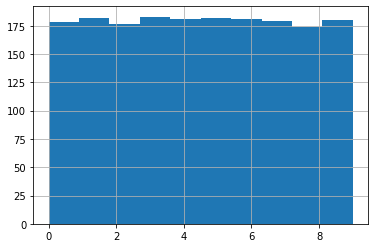

In [157]:
data['target'].hist()

### Data Split <a name="title2" />

In [228]:
train, test = train_test_split(data, test_size=0.1,  random_state=11)
print("Train shape", train.shape)
print("Test shape", test.shape)

Train shape (1617, 65)
Test shape (180, 65)


<AxesSubplot:>

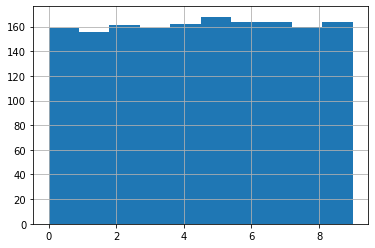

In [229]:
train['target'].hist()

<AxesSubplot:>

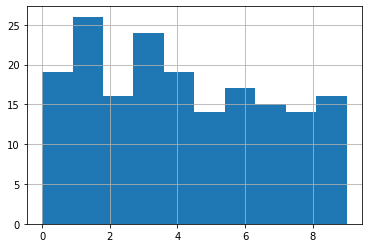

In [230]:
test['target'].hist()

In [231]:
x_train = train.loc[:, train.columns != 'target']
y_train = train['target']
x_test = test.loc[:, test.columns != 'target']
y_test = test['target']
print("Train dimensiom:", x_train.shape, y_train.shape)
print("Test dimensiom:", x_test.shape, y_test.shape)

Train dimensiom: (1617, 64) (1617,)
Test dimensiom: (180, 64) (180,)


In [233]:
kf = KFold(n_splits=4, shuffle=True, random_state= 11)
print(kf)
kf.get_n_splits(train)

KFold(n_splits=4, random_state=11, shuffle=True)


4

### Pre-processing <a name="title3" />

In [234]:
from sklearn.preprocessing import normalize
x_train = normalize(x_train, norm = "l2")
print(x_train.max(), x_train.min())
x_test = normalize(x_test, norm = "l2")
print(x_test.max(), x_test.min())

0.32031106631923656 0.0
0.30866412046611236 0.0


### Vizualization <a name="title4" />

In [239]:
from sklearn.manifold import TSNE
train_embedded = TSNE(n_components=2, random_state=11).fit_transform(x_train)
train_embedded.shape

(1617, 2)

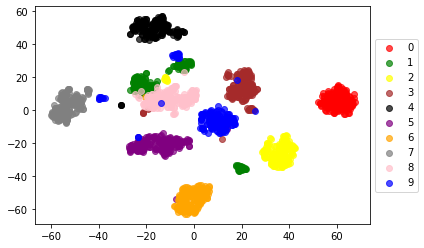

In [247]:
import matplotlib.pyplot as plt
colors = ["red", "green", "yellow", "brown", "black", "purple", "orange", "gray", "pink", "blue"]
color_by_target = []
fig, ax = plt.subplots()
for i in range(10):
    color_i = []
    for j in range(1617):
        if y_values[j] == i:
            color_i.append(train_embedded[j])
    color_by_target.append(color_i)
for i in range(10):
    for j in range(len(color_by_target[i])):
        if j == 0:
            ax.scatter(color_by_target[i][j][0] , color_by_target[i][j][1] , color = colors[i], alpha=0.7, label=str(i))
        else:
            ax.scatter(color_by_target[i][j][0] , color_by_target[i][j][1] , color = colors[i], alpha=0.7)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Training Logistic Regression Multiclass <a name="title5" />

### Training OneVsOne Classifier <a name="title6" />

### Evaluation Logistic Regression Multiclass <a name="title7" />

### Evaluation OneVsOne Classifier <a name="title8" />

### Test Logistic Regression <a name="title9" />

### Test OneVsOne Classifier <a name="title10" />